# CS 4304 - Final Project
### Dylan Ellsworth - 201329133
### Dec. 2, 2021
### Prof. Terrence Tricco

#### Project Goals

Acting as a freelance data visualization specalist, my goal is to answer the question of "How successful has the Tely 10 been over the past 15 years?". The Tely 10 is a 10 mile Road Race that happens in St.John's, Newfoundland every year.

#### Sub-Goals

We can explore the main goal by looking at a few sub-goals. Firstly, "How does the number of Tely 10 participants match up against other 10K races across Canada?".

A second sub-goal we could consider is " How successful has the Tely 10 been, on a local level?"

#### Visualizations

Import libraries and data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import ipywidgets as widgets
from ipywidgets import interact

In [2]:
df = pd.read_csv('tely10.csv')

Filtering the data for the number of participants for each year. Firstly I created a new column and then grouped by the year to get the count of participants for the given year.

In [3]:
df['Participants'] = 0

In [4]:
df_t = df[['year','Participants']].groupby('year').count().reset_index()

This line chart shows the trend of participants for the Tely 10 over the last 15 years. I used a linechart to simply see the ups-and-downs of the number of participants.

Text(0.5, 1.0, 'Tely 10 Participants In The Last 15 Years')

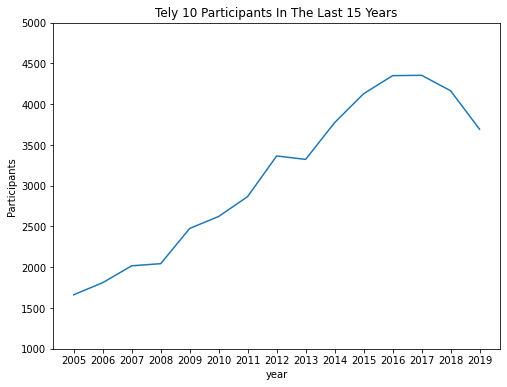

In [5]:
plt.figure(figsize=(8,6))
sns.lineplot(x='year',y='Participants',data=df_t)

plt.yticks(ticks=[1000,1500,2000,2500,3000,3500,4000,4500,5000])
plt.xticks(ticks=[2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019])
plt.title('Tely 10 Participants In The Last 15 Years')

#### "How successful has the Tely 10 been on a local level?"

One way to consider success could be on a local level. The pie chart below shows the top 10 groups and the percentage of participants in that group, compared to the entire race. You could look at this as a success for middle-aged people, and even 50+ individuals. Some may note that the Tely 10 is not a success for the younger crowd, as a small percentage of them par-take, despite probably having the largest abilitiy to do so.

<Figure size 576x432 with 0 Axes>

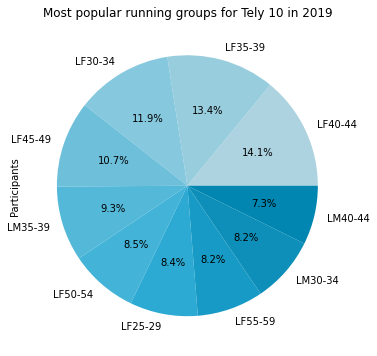

In [6]:
#df2 = df[['division','Participants']].groupby('division').count().reset_index()
plt.figure(figsize=(8,6))
df2 = df[df['year']== 2019]
df2 = df2[['division','Participants']].groupby('division').count().nlargest(10,'Participants')
colors = ['#ACD3DF','#98CDDE','#86C8DE','#6DBFDA','#54B8D9','#43B3D8','#2DAAD3','#179BC6','#0D8FB9','#0086B1']
df2 = df2.plot.pie(y='Participants', figsize=(8,6),autopct='%1.1f%%',legend=False,colors=colors,title='Most popular running groups for Tely 10 in 2019')


This visualization shows data from the largest group, LF40-44. We look at the top 3 runners for each year in this group, and where they are from. It's easy to see that the majority of the winners are from St.John's and the surrounding area.

Text(0.5, 1.0, "Hometowns Of 2019's Top 3 Runners In Group LF40-44")

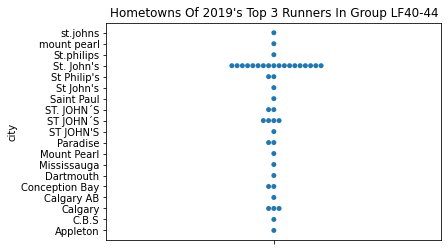

In [12]:
df3 = df[df['division'] == "LF40-44"]
df3 = df3.groupby('year').head(3)
sns.swarmplot(y='city',data=df3)
plt.title("Hometowns Of 2019's Top 3 Runners In Group LF40-44")

#### "How does the number of Tely 10 participants match up against other 10K races across Canada?"

For these two visualizations, we look at the Tely 10 and a few other races across Canada from 2019. I had to create a csv manually, and the data was obtained from roadraceresults.com. The races chosen were those that had the highest number of participants, and took place between July and early August.

In [8]:
races = pd.read_csv('races.csv')

In [9]:
@interact(NL=True,QC=True,AB=True,BC=True,MB=True,NB=True,NS=True,ON=True,PEI=True,SK=True)
def f(NL,QC,AB,BC,MB,NB,NS,ON,PEI,SK):
    Province = []
    if (NL):
        Province.append('Tely 10')
    if (QC):
        Province.append('MEC Montreal')
    if (AB):
        Province.append('lululemon Edmonton')
    if (BC):
        Province.append('Summerfast')
    if (MB):
        Province.append('Mud Hero Winnipeg')
    if (NB):
        Province.append('Marathon By The Sea')
    if (NS):
        Province.append('EPIC Canadian')
    if (ON):
        Province.append('Canada Day Road Race')
    if (PEI):
        Province.append('Georgetown 10k')
    if (SK):
        Province.append('Yorkton Run')
        
    race1 = races[races.race.isin(Province)]
    plt.figure(figsize=(8,6))
    ax = sns.barplot(y='race',x='participants',data=race1)
    plt.xticks(ticks=[0,500,1000,1500,2000,2500,3000,3500,4000,4500,5000,5500,6000])


interactive(children=(Checkbox(value=True, description='NL'), Checkbox(value=True, description='QC'), Checkbox…